In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa import stattools
import statsmodels.api as sm

import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio

In [30]:
data_path = "/content/drive/MyDrive/Colab Notebooks/Hitachi/Data/merged_whole_data.csv"
data_df = pd.read_csv(data_path)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34899 entries, 0 to 34898
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Delivery Day      34899 non-null  object 
 1   Hours             34899 non-null  object 
 2   Prices
(EUR/MWh)  34899 non-null  float64
 3   datetime          34899 non-null  object 
 4   Demand (MW)       27555 non-null  float64
 5   Name              27720 non-null  object 
 6   Temperature       27720 non-null  float64
 7   feelslike         27720 non-null  float64
 8   dewpoint          27720 non-null  float64
 9   humidity          27720 non-null  float64
 10  precipitation     27720 non-null  float64
 11  precipprob        27720 non-null  float64
 12  preciptype        2751 non-null   object 
 13  snow              27702 non-null  float64
 14  snowdepth         27702 non-null  float64
 15  windgust          12223 non-null  float64
 16  windspeed         27720 non-null  float6

<ipython-input-30-ed2c575d0c27>:2: DtypeWarning: Columns (5,12,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(data_path)


In [31]:
price_df = data_df[["datetime", "Prices\n(EUR/MWh)"]]
price_df.head()

,datetime,Prices\n(EUR/MWh)
0,2020-01-01 01:00:00,26.38
1,2020-01-01 02:00:00,26.50
2,2020-01-01 03:00:00,27.01
3,2020-01-01 04:00:00,27.40
4,2020-01-01 05:00:00,27.99


In [32]:
copy_price_df = price_df.copy()
copy_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34899 entries, 0 to 34898
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          34899 non-null  object 
 1   Prices
(EUR/MWh)  34899 non-null  float64
dtypes: float64(1), object(1)
memory usage: 545.4+ KB


In [33]:
copy_price_df['datetime'] = pd.to_datetime(copy_price_df['datetime'])  # Convert the column to datetime if it's not already
copy_price_df = copy_price_df.sort_values(by='datetime')
copy_price_df = copy_price_df.reset_index(drop=True)
copy_price_df.head()

,datetime,Prices\n(EUR/MWh)
0,2020-01-01 00:00:00,34.00
1,2020-01-01 01:00:00,26.38
2,2020-01-01 02:00:00,26.50
3,2020-01-01 03:00:00,27.01
4,2020-01-01 04:00:00,27.40


In [34]:
copy_price_df.tail()

,datetime,Prices\n(EUR/MWh)
34894,2023-12-24 19:00:00,79.99
34895,2023-12-24 20:00:00,71.09
34896,2023-12-24 21:00:00,62.01
34897,2023-12-24 22:00:00,53.41
34898,2023-12-24 23:00:00,50.10


In [35]:
price_series = copy_price_df["Prices\n(EUR/MWh)"]

In [36]:
def check_data_stationarity(X):
  """
    Check if the given series is stationarity time series data or not

    Args:
      X : Time-series data
  """
  # ADF test
  p_threshold = 0.05
  p_val = stattools.adfuller(X)[1]

  if p_val < p_threshold:
    print("Given series is stationarity data")
  else:
    print("Given series is not a stationarity data")

def plot_acf_pacf_graphs(X=None, lags=48):
    """ Plot the PACF and ACF graphs for the time series data X

    Args:
        X (np.array): Time-series data
    """
    fig = plt.figure(figsize=(9, 5))
    fig.subplots_adjust(hspace=0.5)

    # ACF plot
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(X, ax=ax1, lags=lags)

    # PACF plot
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(X, ax=ax2, lags=lags)
    plt.show()

In [37]:
check_data_stationarity(price_series)

Given series is stationarity data


In [38]:
fig = px.line(copy_price_df, x='datetime', y="Prices\n(EUR/MWh)", title='Price Over Time',
              labels={'datetime': 'Date', 'Prices\n(EUR/MWh)': 'Price'})

# Show the plot
fig.show()

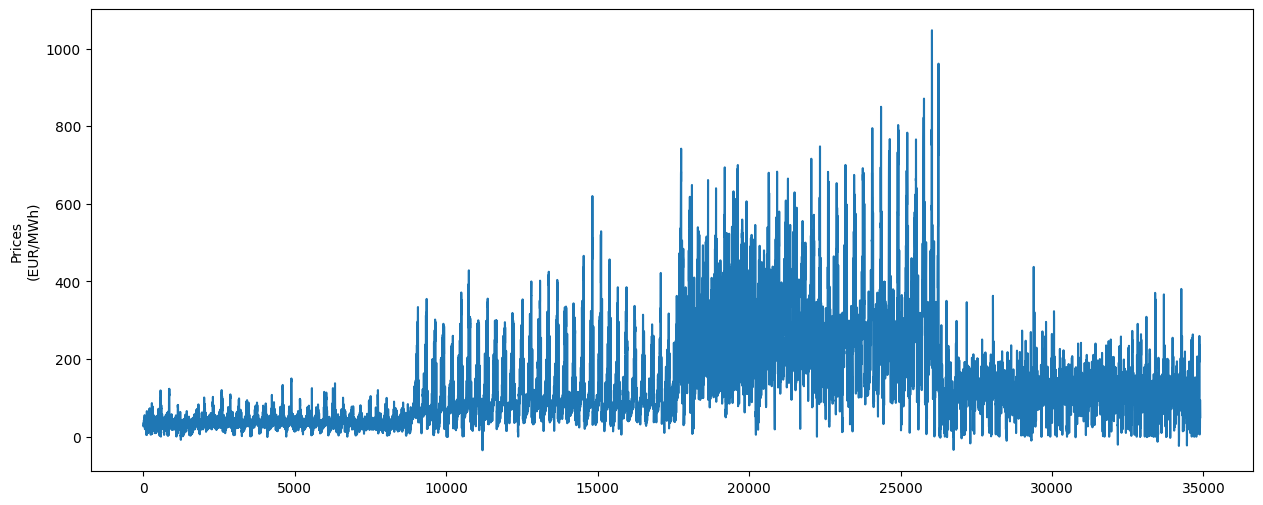

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=price_series)
plt.show()

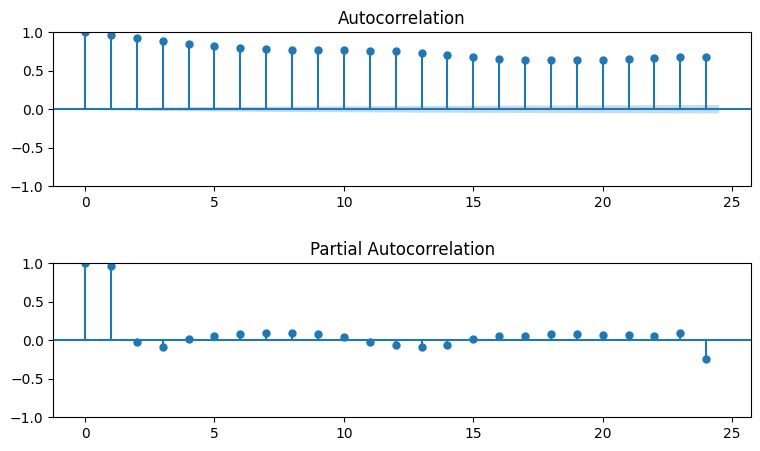

In [ ]:
plot_acf_pacf_graphs(X=price_series, lags=24)

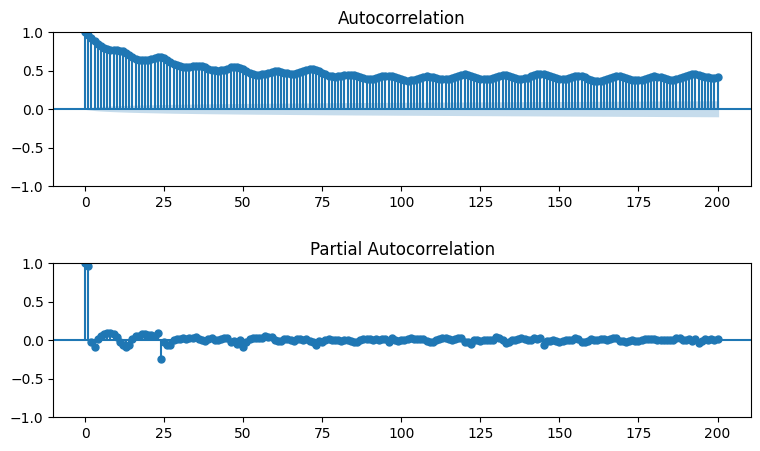

In [ ]:
plot_acf_pacf_graphs(X=price_series, lags=200)

**We can obersve the significant peak point at about 12 and 24 hours lag in the above autocorrelation graph**

In [ ]:
import warnings
# from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tools.sm_exceptions import  ValueWarning
warnings.simplefilter('ignore', ValueWarning)

import time

<Figure size 640x480 with 0 Axes>

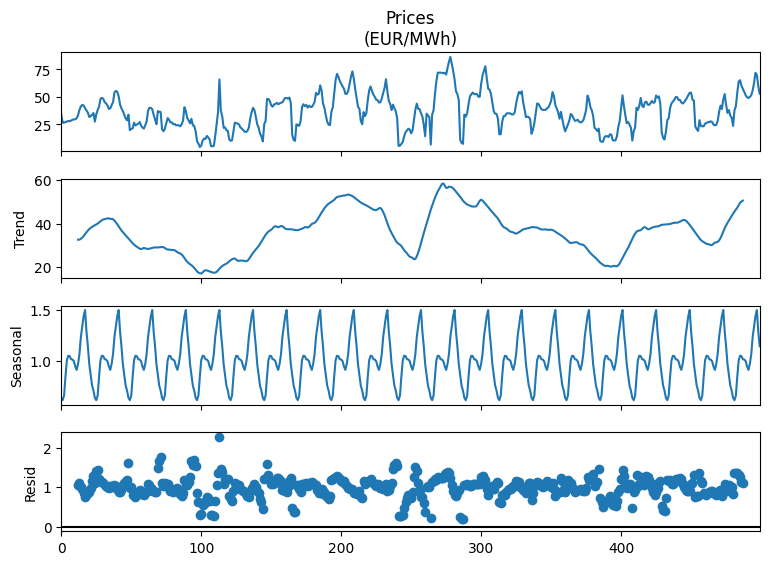

In [ ]:
# # since variance of the changes with time, we are using the multiplicative model
# # With the period of 24 hours or 24 data points, the demand season is repeating again
result = seasonal_decompose(price_series[:500], model='multiplicative', period=24)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(8, 6)
fig.show()

In [8]:
copy_price_df

,datetime,Prices\n(EUR/MWh)
0,2020-01-01 00:00:00,34.00
1,2020-01-01 01:00:00,26.38
2,2020-01-01 02:00:00,26.50
3,2020-01-01 03:00:00,27.01
4,2020-01-01 04:00:00,27.40
...,...,...
34894,2023-12-24 19:00:00,79.99
34895,2023-12-24 20:00:00,71.09
34896,2023-12-24 21:00:00,62.01
34897,2023-12-24 22:00:00,53.41


In [39]:
import numpy as np

def sampling(sequence, n_steps):
  X, Y = list(), list()
  for i in range(len(sequence)):
    sam = i + n_steps
    if sam > len(sequence)-1:
      break
    x, y = sequence[i:sam], sequence[sam]
    X.append(x)
    Y.append(y)

  return np.array(X), np.array(Y)


In [40]:
n_steps = 100
X, Y = sampling(price_series.tolist(), n_steps)

In [41]:
for i in range(len(X)):
  print(X[i], Y[i])
  break

[34.   26.38 26.5  27.01 27.4  27.99 27.71 28.4  28.98 29.5  29.43 30.51
 33.32 38.11 41.24 42.66 42.08 39.51 37.5  35.6  31.6  32.3  33.6  35.2
 27.37 34.05 37.92 41.04 48.13 49.11 48.13 45.11 44.   42.2  38.99 39.41
 42.52 45.09 54.   55.46 54.55 50.51 42.92 39.45 37.04 33.55 30.4  28.53
 33.73 19.55 20.78 21.15 26.45 23.9  24.79 25.5  26.99 23.99 21.99 20.99
 24.08 27.61 37.4  39.98 39.98 38.63 33.57 29.5  25.   37.   36.34 36.21
 20.57 18.62 20.8  25.83 30.64 29.13 26.63 26.71 25.   25.21 23.99 24.22
 23.92 23.08 24.91 28.39 40.54 36.99 30.64 28.48 25.83 29.95 24.05 23.36
 18.54  9.49  7.33  4.24] 5.45


In [47]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

n_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [48]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [49]:
X.shape

(34799, 100, 1)

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model.fit(X, Y, epochs=200, verbose=0)

KeyboardInterrupt: 

In [56]:
x = np.array(price_series[-n_steps:])
x = x.reshape((1, n_steps, 1))